In [1]:
import pandas as pd

# Load the dataset
dataset_path = "cryptography_dataset_enhanced.csv"
df = pd.read_csv(dataset_path)

# Display basic info
print("Dataset Info:")
print(df.info())

# Display first few rows
print("First 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952 entries, 0 to 4951
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Plaintext   4952 non-null   object
 1   Ciphertext  4952 non-null   object
 2   Algorithm   4951 non-null   object
 3   Key         4363 non-null   object
dtypes: object(4)
memory usage: 154.9+ KB
None
First 5 Rows:
                          Plaintext  \
0  DdClLbN6qfFRtpVyP033zCjp0FndJ53O   
1  SJktYGKNee2MKBz1dsoyntoC0LrpmZOX   
2  32VKfI0uqZgPUmWgHgPFFcwDWG1ONHWM   
3  qKIpLiJrQ81sTRK2U1OSH0i6OpiBYDul   
4  7yOAGHJ0f2KfEqcyVce6tJ5FJmuhXkLC   

                                          Ciphertext Algorithm  \
0  9HtvDQw6d0hnjkkokNpaAa7aO4zxbvPEfqpKr3PwnnMo6x...  Blowfish   
1       BDu9JxclhcofdpFkBRLTYVLD21dg2tqY/NFlN1CRpls=       RC4   
2  603b2ef6a5f42bb1924fea4d22f1af6b49cf8abfaf385f...   SHA-256   
3  7cJcDg85U4BuuCEreK+C7LouVenzQHJ8FFII3Ei2yp3Ud8...      3DES   
4  LMhm3BjIcUb

In [2]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Plaintext       0
Ciphertext      0
Algorithm       1
Key           589
dtype: int64


In [3]:
# Fill missing values in 'Key' column
df['Key'].fillna('Unknown', inplace=True)

<ipython-input-3-41fdc5e91958>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Key'].fillna('Unknown', inplace=True)


<ipython-input-4-39fe02dead11>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')


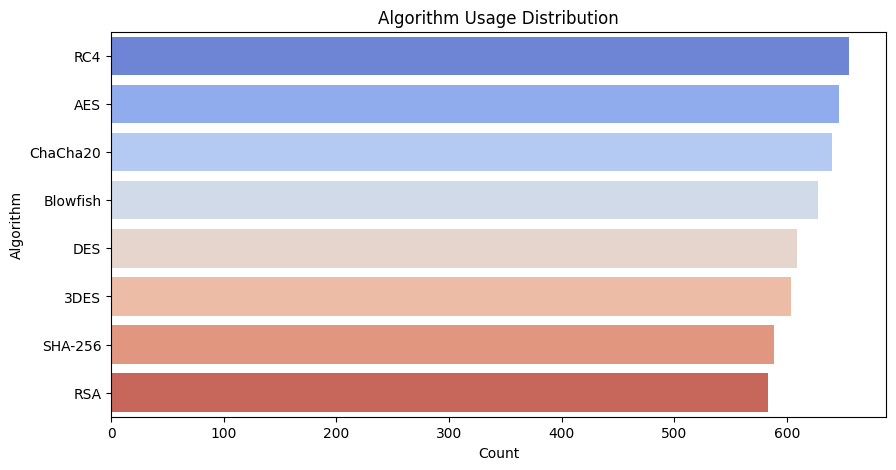

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')
plt.title('Algorithm Usage Distribution')
plt.xlabel('Count')
plt.ylabel('Algorithm')
plt.show()

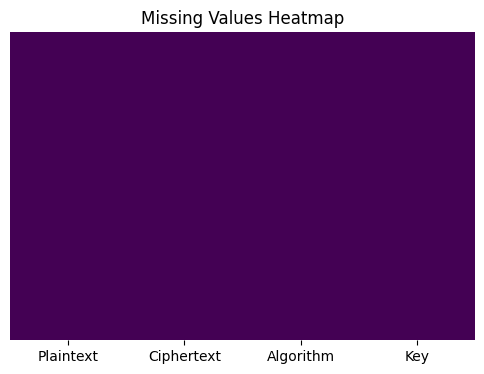

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


<ipython-input-6-dcb0fef7b4bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')


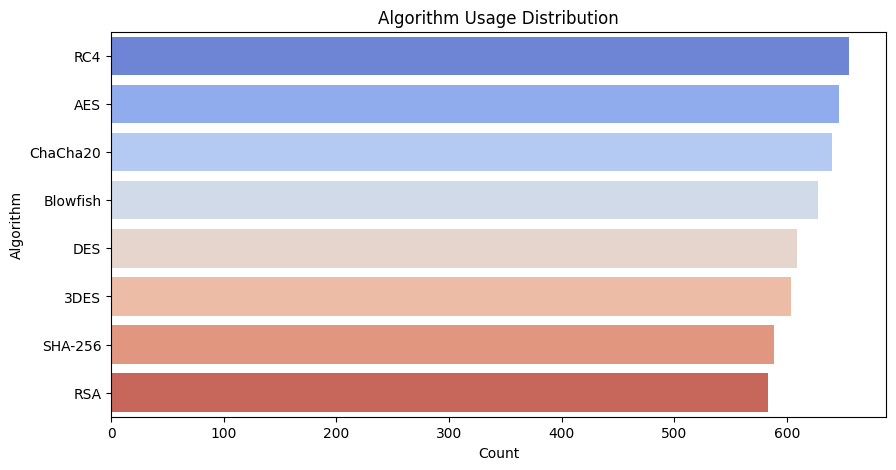

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')
plt.title('Algorithm Usage Distribution')
plt.xlabel('Count')
plt.ylabel('Algorithm')
plt.show()


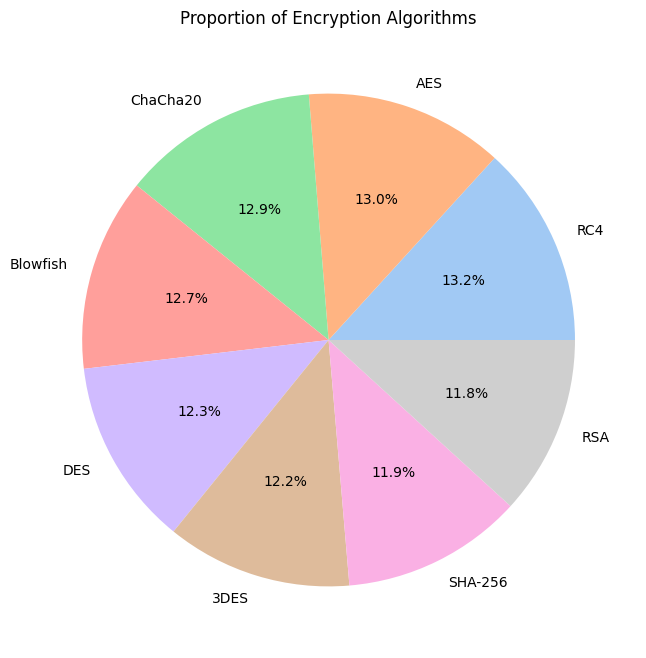

In [7]:
plt.figure(figsize=(8, 8))
df['Algorithm'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Proportion of Encryption Algorithms')
plt.ylabel('')
plt.show()


<ipython-input-8-a1c746d029c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Algorithm'], y=df['Ciphertext_Length'], palette='muted')


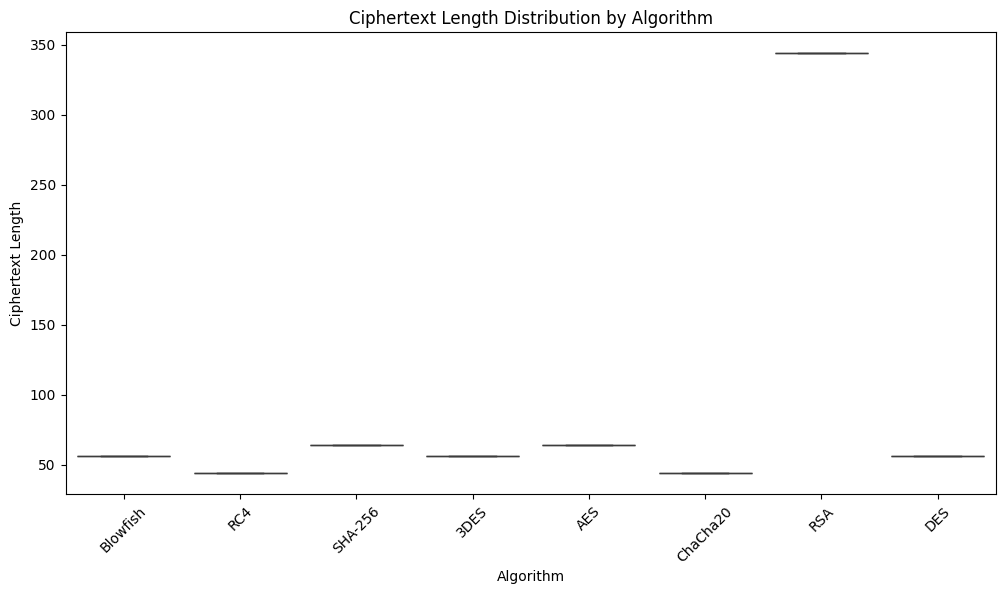

In [8]:
df['Ciphertext_Length'] = df['Ciphertext'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Algorithm'], y=df['Ciphertext_Length'], palette='muted')
plt.title('Ciphertext Length Distribution by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Ciphertext Length')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-dcb0fef7b4bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')


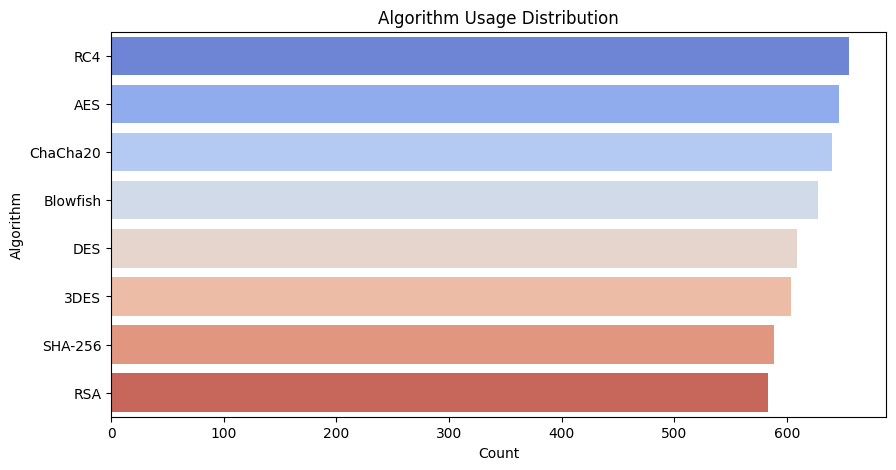

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')
plt.title('Algorithm Usage Distribution')
plt.xlabel('Count')
plt.ylabel('Algorithm')
plt.show()


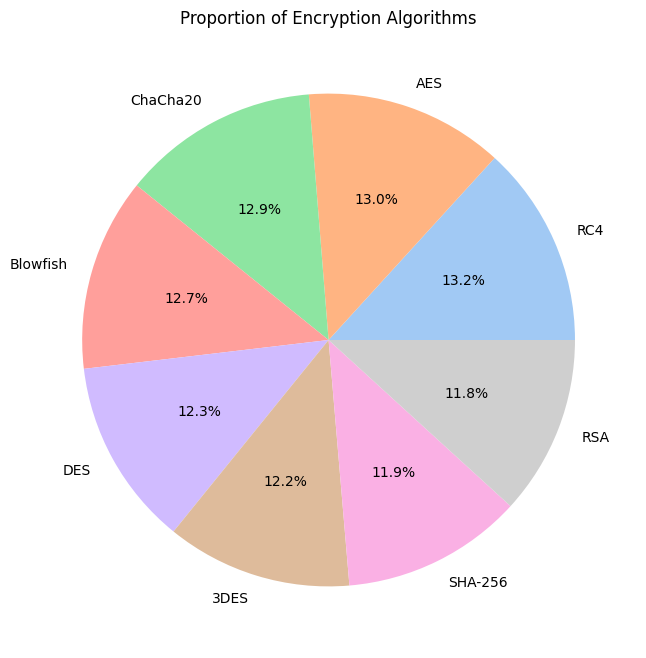

In [12]:
plt.figure(figsize=(8, 8))
df['Algorithm'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Proportion of Encryption Algorithms')
plt.ylabel('')
plt.show()


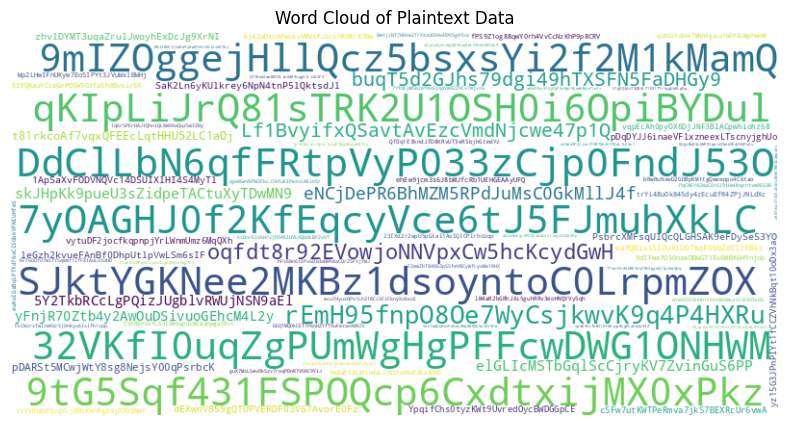

In [14]:
from wordcloud import WordCloud

plaintext_text = ' '.join(df['Plaintext'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(plaintext_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plaintext Data')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from wordcloud import WordCloud

# Load the dataset
dataset_path = "cryptography_dataset_enhanced.csv"
df = pd.read_csv(dataset_path)

# Fill missing values in 'Key' column
df['Key'].fillna('Unknown', inplace=True)

# Add derived features
df['Key_Length'] = df['Key'].apply(lambda x: len(x) if x != 'Unknown' else 0)
df['Ciphertext_Length'] = df['Ciphertext'].apply(len)

def plot_visualization(viz_type):
    plt.figure(figsize=(10, 6))

    if viz_type == "Algorithm Usage Distribution (Bar Chart)":
        sns.countplot(y=df['Algorithm'], order=df['Algorithm'].value_counts().index, palette='coolwarm')
        plt.title('Algorithm Usage Distribution')
        plt.xlabel('Count')
        plt.ylabel('Algorithm')

    elif viz_type == "Key Length Distribution (Histogram)":
        sns.histplot(df['Key_Length'], bins=20, kde=True, color='blue')
        plt.title('Key Length Distribution')
        plt.xlabel('Key Length')
        plt.ylabel('Frequency')

    elif viz_type == "Algorithm Proportion (Pie Chart)":
        df['Algorithm'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
        plt.title('Proportion of Encryption Algorithms')
        plt.ylabel('')

    elif viz_type == "Ciphertext Length vs. Algorithm (Box Plot)":
        sns.boxplot(x=df['Algorithm'], y=df['Ciphertext_Length'], palette='muted')
        plt.title('Ciphertext Length Distribution by Algorithm')
        plt.xlabel('Algorithm')
        plt.ylabel('Ciphertext Length')
        plt.xticks(rotation=45)

    elif viz_type == "Missing Values Heatmap":
        sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
        plt.title('Missing Values Heatmap')

    elif viz_type == "Correlation Heatmap (Feature Relationship)":
        sns.heatmap(df[['Key_Length', 'Ciphertext_Length']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')

    elif viz_type == "Pair Plot (Feature Relationship Patterns)":
        sns.pairplot(df[['Key_Length', 'Ciphertext_Length']], diag_kind='kde')
        plt.show()
        return  # Skip plt.show() since pairplot auto-displays

    elif viz_type == "Word Cloud for Plaintext Data":
        plaintext_text = ' '.join(df['Plaintext'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(plaintext_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Plaintext Data')

    plt.show()

# Interactive dropdown
interact(plot_visualization, viz_type=[
    "Algorithm Usage Distribution (Bar Chart)",
    "Key Length Distribution (Histogram)",
    "Algorithm Proportion (Pie Chart)",
    "Ciphertext Length vs. Algorithm (Box Plot)",
    "Missing Values Heatmap",
    "Correlation Heatmap (Feature Relationship)",
    "Pair Plot (Feature Relationship Patterns)",
    "Word Cloud for Plaintext Data"
]);


<ipython-input-15-541a7cb5e4ef>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Key'].fillna('Unknown', inplace=True)


interactive(children=(Dropdown(description='viz_type', options=('Algorithm Usage Distribution (Bar Chart)', 'K…